In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a single image
def load_image(image_path):
    image = cv2.imread(image_path)
    return image


In [ ]:
# Analyze facial expressions based on brightness
def analyze_facial_expression(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    sentiments = []
    numerical_features = []

    for (x, y, w, h) in faces:
        roi = gray[y:y + h, x:x + w]

        # Mouth region analysis 
        mouth_roi = roi[int(h * 0.5):h, :]  # Lower half for mouth
        mouth_intensity = np.mean(mouth_roi)

        # Simple heuristic for emotion detection based on mouth brightness
        if mouth_intensity > 120:  # Threshold for happiness
            sentiment = "Happy"
        elif mouth_intensity < 40:  # Lower intensity might indicate sadness
            sentiment = "Sad"
        else:
            sentiment = "Neutral"

        sentiments.append(sentiment)

        # Draw rectangle around the face and add sentiment text
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, sentiment, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

        # Calculate numerical features
        numerical_features.append({
            "Mouth Intensity": mouth_intensity,
            "Face Width": w,
            "Face Height": h,
            "X Position": x,
            "Y Position": y,
        })

    return sentiments, image, numerical_features


In [ ]:
def count_sentiments(sentiments):
    sentiment_counts = {"Happy": 0, "Sad": 0, "Neutral": 0}
    
    for sentiment in sentiments:
        sentiment_counts[sentiment] += 1
    
    return sentiment_counts

# Find the highest sentiment
def find_highest_sentiment(sentiment_counts):
    highest_sentiment = max(sentiment_counts, key=sentiment_counts.get)
    highest_count = sentiment_counts[highest_sentiment]
    
    return highest_sentiment, highest_count


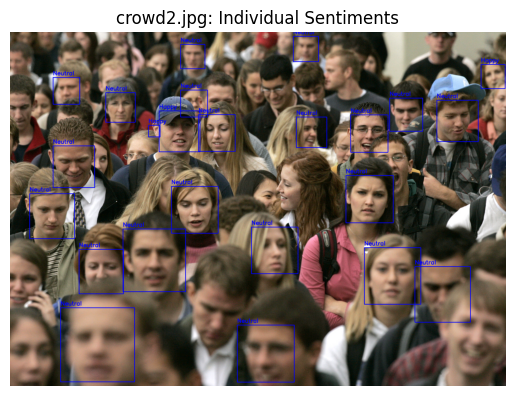

Sentiment Counts: {'Happy': 3, 'Sad': 0, 'Neutral': 21}
Highest Sentiment: Neutral with Count: 21
Face 1:
  Mouth Intensity: 143.98204081632653
  Face Width: 49
  Face Height: 49
  X Position: 586
  Y Position: 398
Face 2:
  Mouth Intensity: 80.41483488220568
  Face Width: 241
  Face Height: 241
  X Position: 962
  Y Position: 1242
Face 3:
  Mouth Intensity: 111.5416658187664
  Face Width: 313
  Face Height: 313
  X Position: 214
  Y Position: 1169
Face 4:
  Mouth Intensity: 113.19401176877813
  Face Width: 107
  Face Height: 107
  X Position: 1199
  Y Position: 22
Face 5:
  Mouth Intensity: 95.04051607062019
  Face Width: 188
  Face Height: 188
  X Position: 292
  Y Position: 922
Face 6:
  Mouth Intensity: 109.36141363144608
  Face Width: 235
  Face Height: 235
  X Position: 1714
  Y Position: 995
Face 7:
  Mouth Intensity: 101.34866430805518
  Face Width: 197
  Face Height: 197
  X Position: 1022
  Y Position: 828
Face 8:
  Mouth Intensity: 114.09703626220363
  Face Width: 239
  Face

In [44]:
#Load and analyze a single image
image_path = r"C:\Users\PRERNA\Downloads\crowd2.jpg"  # Change to your image file
image = load_image(image_path)

# Analyze facial expressions
sentiments, annotated_image, numerical_features = analyze_facial_expression(image)

# Count sentiments
sentiment_counts = count_sentiments(sentiments)

# Find the highest sentiment
highest_sentiment, highest_count = find_highest_sentiment(sentiment_counts)

# Display the annotated image
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title(f"{os.path.basename(image_path)}: Individual Sentiments")
plt.axis('off')
plt.show()

# Output the counts and the highest sentiment
print(f"Sentiment Counts: {sentiment_counts}")
print(f"Highest Sentiment: {highest_sentiment} with Count: {highest_count}")

# Print numerical features for each face detected
for idx, features in enumerate(numerical_features):
    print(f"Face {idx + 1}:")
    for feature, value in features.items():
        print(f"  {feature}: {value}")


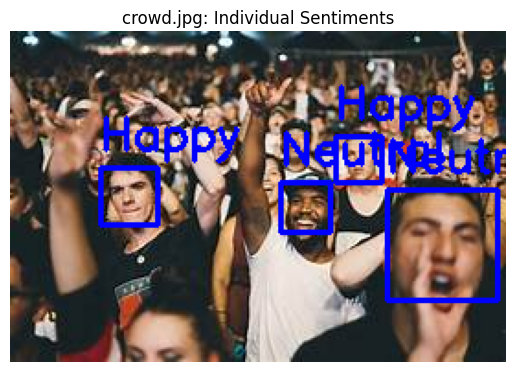

Sentiment Counts: {'Happy': 2, 'Sad': 0, 'Neutral': 2}
Highest Sentiment: Happy with Count: 2
Face 1:
  Mouth Intensity: 101.47089947089947
  Face Width: 27
  Face Height: 27
  X Position: 147
  Y Position: 82
Face 2:
  Mouth Intensity: 136.4616935483871
  Face Width: 31
  Face Height: 31
  X Position: 49
  Y Position: 74
Face 3:
  Mouth Intensity: 169.18153846153845
  Face Width: 25
  Face Height: 25
  X Position: 177
  Y Position: 57
Face 4:
  Mouth Intensity: 103.14666666666666
  Face Width: 60
  Face Height: 60
  X Position: 205
  Y Position: 86


In [46]:
#Load and analyze a single image
image_path = r"C:\Users\PRERNA\Downloads\crowd.jpg"  # Change to your image file
image = load_image(image_path)

# Analyze facial expressions
sentiments, annotated_image, numerical_features = analyze_facial_expression(image)

# Count sentiments
sentiment_counts = count_sentiments(sentiments)

# Find the highest sentiment
highest_sentiment, highest_count = find_highest_sentiment(sentiment_counts)

# Display the annotated image
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title(f"{os.path.basename(image_path)}: Individual Sentiments")
plt.axis('off')
plt.show()

# Output the counts and the highest sentiment
print(f"Sentiment Counts: {sentiment_counts}")
print(f"Highest Sentiment: {highest_sentiment} with Count: {highest_count}")

# Print numerical features for each face detected
for idx, features in enumerate(numerical_features):
    print(f"Face {idx + 1}:")
    for feature, value in features.items():
        print(f"  {feature}: {value}")


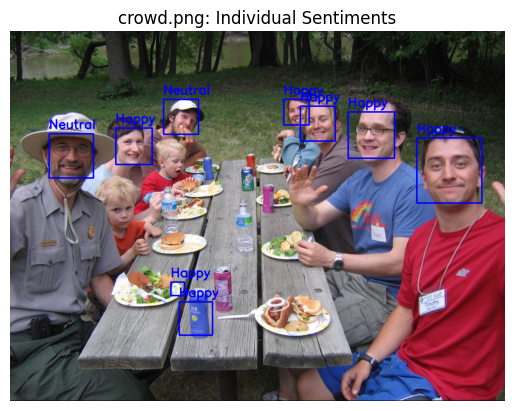

Sentiment Counts: {'Happy': 7, 'Sad': 0, 'Neutral': 2}
Highest Sentiment: Happy with Count: 7
Face 1:
  Mouth Intensity: 202.2958579881657
  Face Width: 26
  Face Height: 26
  X Position: 309
  Y Position: 482
Face 2:
  Mouth Intensity: 131.11591836734695
  Face Width: 70
  Face Height: 70
  X Position: 203
  Y Position: 186
Face 3:
  Mouth Intensity: 120.19102040816327
  Face Width: 49
  Face Height: 49
  X Position: 526
  Y Position: 131
Face 4:
  Mouth Intensity: 85.32366621067031
  Face Width: 85
  Face Height: 85
  X Position: 75
  Y Position: 197
Face 5:
  Mouth Intensity: 118.86786654960491
  Face Width: 67
  Face Height: 67
  X Position: 295
  Y Position: 131
Face 6:
  Mouth Intensity: 123.38844444444445
  Face Width: 125
  Face Height: 125
  X Position: 782
  Y Position: 205
Face 7:
  Mouth Intensity: 121.52853380158034
  Face Width: 67
  Face Height: 67
  X Position: 558
  Y Position: 144
Face 8:
  Mouth Intensity: 131.31585518102372
  Face Width: 89
  Face Height: 89
  X Pos

In [47]:
#Load and analyze a single image
image_path = r"C:\Users\PRERNA\Downloads\crowd.png"  # Change to your image file
image = load_image(image_path)

# Analyze facial expressions
sentiments, annotated_image, numerical_features = analyze_facial_expression(image)

# Count sentiments
sentiment_counts = count_sentiments(sentiments)

# Find the highest sentiment
highest_sentiment, highest_count = find_highest_sentiment(sentiment_counts)

# Display the annotated image
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title(f"{os.path.basename(image_path)}: Individual Sentiments")
plt.axis('off')
plt.show()

# Output the counts and the highest sentiment
print(f"Sentiment Counts: {sentiment_counts}")
print(f"Highest Sentiment: {highest_sentiment} with Count: {highest_count}")

# Print numerical features for each face detected
for idx, features in enumerate(numerical_features):
    print(f"Face {idx + 1}:")
    for feature, value in features.items():
        print(f"  {feature}: {value}")
